<a href="https://colab.research.google.com/github/msiplab/EicEngLabIV/blob/master/example02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験Ⅳー２　時系列データのThingSpeak入力

- ThingSpeak からデータの抽出
- JSON形式をpandas.DataFrameに変換

新潟大学工学部工学科　電子情報通信プログラム

## 準備

In [5]:
!pip install thingspeak
!pip install japanize-matplotlib 
%matplotlib inline

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import thingspeak
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import japanize_matplotlib
sns.set(font="IPAexGothic")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ThingSpeakデータの読み込み
- https://thingspeak.com/channels/1101887
- nEntries: 取得するデータ数



In [6]:
nEntries = 240
ch = thingspeak.Channel(1101887,fmt='json')
jsn = json.loads(ch.get({'results': nEntries, 'timezone': 'Asia/Tokyo'})) 
df_feeds = pd.DataFrame(jsn['feeds'])
df_feeds.created_at = pd.to_datetime(df_feeds.created_at) # 日時型に変換
df_feeds.field1 = df_feeds.field1.astype(float)
df_feeds.field2 = df_feeds.field2.astype(float)
df_feeds.field3 = df_feeds.field3.astype(float)
df_timeseries = df_feeds.rename(columns={'created_at': 't',
                    'field1': 'a_1', 'field2': 'a_2', 'field3': 'a_3'}).dropna()
display(df_timeseries)


,t,entry_id,a_1,a_2,a_3
0,2023-04-27 12:07:02+09:00,1,-1.322774,5.855299,7.895107
1,2023-04-27 12:07:03+09:00,2,-6.045568,3.506593,5.191893
2,2023-04-27 12:07:04+09:00,3,-2.630091,0.106054,8.581924
3,2023-04-27 12:07:05+09:00,4,-4.911811,0.859902,0.114886
4,2023-04-27 12:07:06+09:00,5,-0.760733,0.435744,9.560574
5,2023-04-27 12:07:07+09:00,6,-5.355698,-0.531829,3.930032
6,2023-04-27 12:07:08+09:00,7,1.181277,2.688742,9.464718
7,2023-04-27 12:07:09+09:00,8,-1.156375,3.318015,8.784722
8,2023-04-27 12:07:10+09:00,9,-0.185599,0.715033,9.317285
9,2023-04-27 12:07:11+09:00,10,-3.271252,-1.219200,7.408903


## 時系列プロット

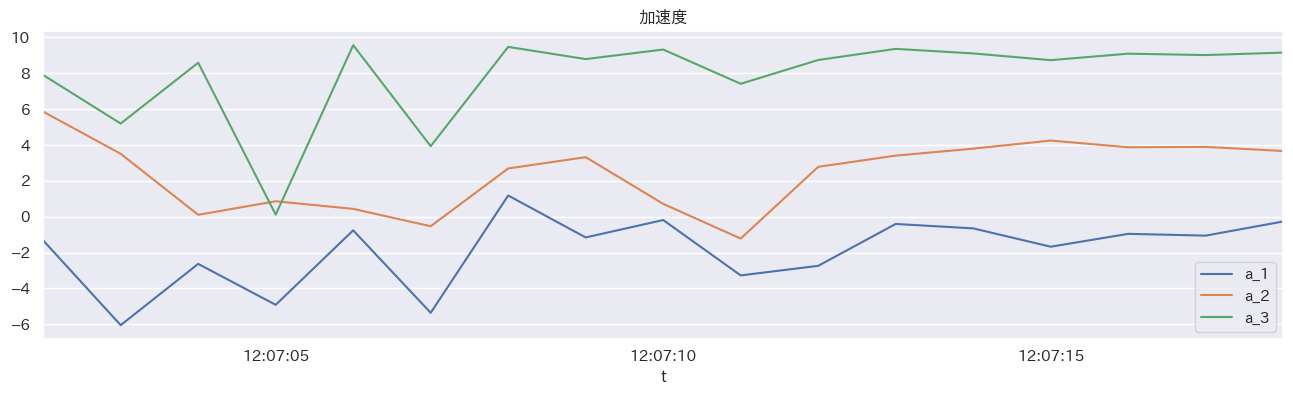

In [7]:
ax = df_timeseries.plot(x='t', y=['a_1', 'a_2', 'a_3'], figsize=(16,4), title='加速度')

## ３次元プロット

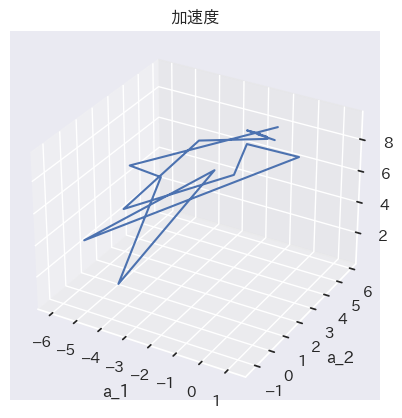

In [8]:
from mpl_toolkits import mplot3d 
ax = plt.axes(projection='3d')
a1 = df_timeseries['a_1']
a2 = df_timeseries['a_2']
a3 = df_timeseries['a_3']
ax.plot(a1,a2,a3)
ax.set_title('加速度')
ax.set_xlabel('a_1')
ax.set_ylabel('a_2')
ax.set_zlabel('a_3')
plt.show()